In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

/Users/abhishekkumarsarkar/anaconda3/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal



##### Importing data from yahoo finance historical data<br><br> "https://in.finance.yahoo.com/quote/PG/history?p=PG"  

#### The Procter & Gamble Company (PG)
#### Microsoft Corporation (MSFT)  
#### Ford Motor Company (F)
#### General Electric Company (GE)

In [2]:
tickers = ["PG", "MSFT", "F", "GE"]
mydata = pd.DataFrame()
for t in tickers:
    mydata[t]=wb.DataReader(t,data_source='yahoo', start='1995-1-1')['Adj Close']

In [3]:
mydata.info() # DATA is clean and organized

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6326 entries, 1995-01-03 to 2020-02-18
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6326 non-null   float64
 1   MSFT    6326 non-null   float64
 2   F       6326 non-null   float64
 3   GE      6326 non-null   float64
dtypes: float64(4)
memory usage: 247.1 KB


In [4]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2020-02-11,124.160004,184.440002,8.10,12.85
2020-02-12,123.449997,184.710007,8.24,13.16
2020-02-13,124.959999,183.710007,8.25,12.94
2020-02-14,126.139999,185.350006,8.10,12.83
2020-02-18,124.870003,187.229996,8.06,12.75


In [5]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.362394,2.420130,3.200019,2.731941
1995-01-04,6.311395,2.437722,3.286119,2.731941
1995-01-05,6.222139,2.397512,3.257418,2.738635
1995-01-06,6.234891,2.437722,3.257418,2.725244
1995-01-09,6.209391,2.422644,3.314818,2.698461


#### Normalization the data to 100<br><br><br>

(Pt/P0)*100

In [6]:
mydata.iloc[0]

PG      6.362394
MSFT    2.420130
F       3.200019
GE      2.731941
Name: 1995-01-03 00:00:00, dtype: float64

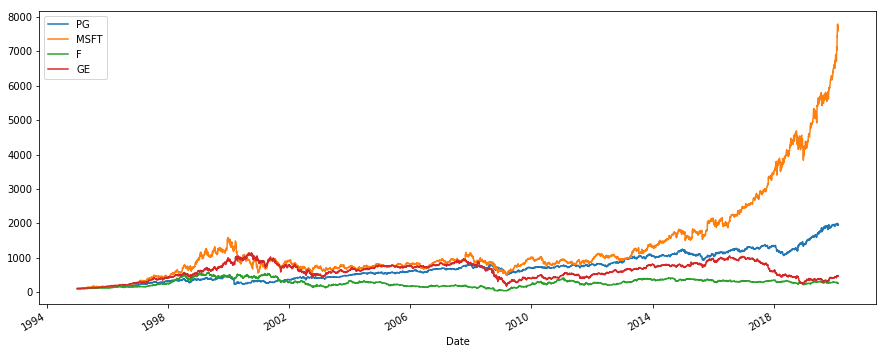

In [7]:
(mydata/mydata.iloc[0]*100).plot(figsize = (15,6)); #all the line is starting from 0 as first location 
                                                    # divided by first location always give 1*100 = 100 i.e y axis
plt.show()

if we do not do like this we will get different graphs all together i.e 

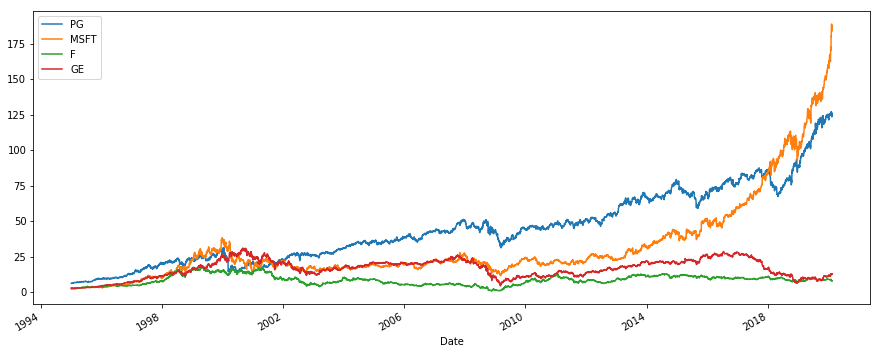

In [8]:
mydata.plot(figsize = (15,6))
plt.show()

### Calculating Simple Rate of Return for these stocks

In [9]:
returns = (mydata/mydata.shift(1))-1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002450
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017621,-0.009828


### Equally distributed weight

In [10]:
weights = np.array([0.25, 0.25, 0.25, 0.25]) # weights equally distributed to all stocks which sum up to 1

So we will do matrix multiplication with the weight array to the return. Multiplying each stock weight with its return

In [11]:
np.dot(returns, weights)

array([        nan,  0.0065398 , -0.00923003, ..., -0.00217148,
       -0.0020781 , -0.00277472])

but we need one number that give us the return of the entire portfolio.  
So we need annual return estimation of each stock

In [12]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.142188
MSFT    0.219942
F       0.113060
GE      0.106761
dtype: float64

In [13]:
np.dot(annual_returns, weights)

0.14548760800666855

In [14]:
print(str(round(np.dot(annual_returns, weights), 5)*100)+'%')

14.549000000000001%


### Randomly distributed weight

In [15]:
weights_2 = np.array([0.4,0.4,0.15,0.05])

In [16]:
print(str(round(np.dot(annual_returns, weights_2), 5)*100)+'%')

16.715%


## Hence second portfolio has Highest Rate of Return